# Data Analysis Professional Track 
## Project: Wrangle and Analyze Data

## Gather

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
import warnings
warnings.simplefilter('ignore')

In [4]:
# Gather the twitter archive dataset
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

# Download the Image Predictions File from a url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
# Gather The image predictions dataset   
image_predictions_df  = pd.read_csv('image_predictions.tsv', sep='\t')

In [8]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = '' 

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Unique tweets of twitter-archive-enhanced.csv file.
tweet_ids = twitter_archive_df.tweet_id.values
# Get the number of unique tweets
len(tweet_ids)

# List of error
fails_dict = {}

# Current time when the Twitter API starts.
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, wait_on_rate_limit = True, wait_on_rate_limit_notify = True, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass
        
# Current time when the Twitter API ends.        
end = timer()


Rate limit reached. Sleeping for: 80
Rate limit reached. Sleeping for: 417
Rate limit reached. Sleeping for: 373


In [10]:
# Calculate the time taken in minutes.
time_taken = (end - start)/60

# Print the time taken of the loop.
print("time taken: {} minutes".format(time_taken))

time taken: 38.162192178333335 minutes


In [5]:
# Read the saved tweet_json.txt file into a dataframe
df_tweet_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_tweet_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api_df = pd.DataFrame(df_tweet_list)

## Assess

###### 1. Visual Assessment

In [6]:
# Display the twitter_archive_df dataset 
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [8]:
# Display image_predictions_df dataset
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
# Display api_df dataset
api_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7542,35563
1,892177421306343426,5591,30756
2,891815181378084864,3705,23126
3,891689557279858688,7723,38878
4,891327558926688256,8322,37136
...,...,...,...
2326,666049248165822465,40,95
2327,666044226329800704,126,265
2328,666033412701032449,39,110
2329,666029285002620928,41,119


##### 2. Programmatic Assessment

In [12]:
# Get Number of rows and columns in `twitter_archive_df` dataset
twitter_archive_df.shape

(2356, 17)

In [13]:
# Get info about `twitter_archive_df` dataset
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# Print the random 10 rows of the `twitter_archive_df` dataset
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
591,799063482566066176,NaN,NaN,2016-11-17 01:35:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mister. He only wears the most fashionable af headwear. 11/10 h*ckin stylish https://t.co/BXJFKOVnJm,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/799063482566066176/photo/1,https://twitter.com/dog_rates/status/799063482566066176/photo/1,https://twitter.com/dog_rates/status/799063482566066176/photo/1,https://twitter.com/dog_rates/status/799063482566066176/photo/1",11,10,Mister,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",10,10,Oliviér,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
1617,685169283572338688,NaN,NaN,2016-01-07 18:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Gerbald. He just found out he's adopted. Poor pupper. Snazzy tongue tho. 11/10 would hold close in time of need https://t.co/UfGkB9Wrud,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685169283572338688/photo/1,11,10,Gerbald,None,None,pupper,None
2189,668967877119254528,6.689207e+17,21435658.0,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
932,754011816964026368,NaN,NaN,2016-07-15 17:56:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/754011816964026368/photo/1,https://twitter.com/dog_rates/status/754011816964026368/photo/1",12,10,Charlie,None,None,None,None
309,835536468978302976,NaN,NaN,2017-02-25 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Lola. Her hobbies include being precious af and using her foot as a toothbrush. 12/10 Lola requests your help\n\nhttps://…,8.352641e+17,4.196984e+09,2017-02-24 23:04:14 +0000,"https://www.gofundme.com/lolas-life-saving-surgery-funds,https://twitter.com/dog_rates/status/835264098648616962/photo/1,https://twitter.com/dog_rates/status/835264098648616962/photo/1",12,10,Lola,None,None,None,None
141,864873206498414592,NaN,NaN,2017-05-17 16:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only r

In [15]:
# Print the last 5 rows of the `twitter_archive_df` dataset
twitter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [16]:
# Get duplicated records
twitter_archive_df[twitter_archive_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
# Get number of records that have "None" value in `name` column
twitter_archive_df[twitter_archive_df.name == 'None'].shape[0]

745

In [18]:
# Get total number of records that have "null" value in `name` column
twitter_archive_df.name.isnull().sum()

0

In [19]:
# Get the name of dogs with count of each in 'name' column
twitter_archive_df.name.value_counts()

None       745
a          55 
Charlie    12 
Cooper     11 
Oliver     11 
           .. 
Ambrose    1  
Tripp      1  
Tom        1  
Flash      1  
Bloop      1  
Name: name, Length: 957, dtype: int64

In [20]:
# Get all name of dogs that have length is less than 3 character
twitter_archive_df[twitter_archive_df.name.str.len() < 3].name.value_counts()

a     55
Bo    9 
an    7 
by    1 
Mo    1 
JD    1 
my    1 
Al    1 
Jo    1 
Ed    1 
O     1 
Name: name, dtype: int64

In [466]:
twitter_archive_df_clean[twitter_archive_df_clean.name == 'O'].text

775    This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
Name: text, dtype: object

In [467]:
twitter_archive_df_clean[twitter_archive_df_clean.name == 'Al'].text

820    Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV
Name: text, dtype: object

In [28]:
# Get all name of dogs that start with lowercase letter
twitter_archive_df[twitter_archive_df['name'].str[0].str.islower()].name.value_counts()

a               55
the             8 
an              7 
very            5 
just            4 
one             4 
quite           4 
not             2 
mad             2 
getting         2 
actually        2 
light           1 
unacceptable    1 
this            1 
my              1 
all             1 
old             1 
life            1 
space           1 
such            1 
infuriating     1 
by              1 
his             1 
incredibly      1 
officially      1 
Name: name, dtype: int64

In [29]:
# Get retweets and replies records
retweet_entries = twitter_archive_df.retweeted_status_id.notnull()
replies_entries = twitter_archive_df.in_reply_to_status_id.notnull()

# Check the number of rows of retweets and replies
print(twitter_archive_df[retweet_entries].shape[0])
print(twitter_archive_df[replies_entries].shape[0])

181
78


In [30]:
# Get Number of rows that have "null" value in `expanded_urls' column
twitter_archive_df[twitter_archive_df.expanded_urls.isnull()].shape[0]

59

In [31]:
# Get numerator rating with count of each in 'rating_numerator' column
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [32]:
# Get denominator rating with count of each in 'rating_denominator' column
twitter_archive_df.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [33]:
# Get text of records that have rating_numerator < 5
twitter_archive_df[twitter_archive_df['rating_numerator'] < 5 ].text

315     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag                           
605     RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
765     This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M
883     This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP
912     Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl
1004    Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R  
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment ht

In [35]:
# Get text of records that have rating_numerator > 15
twitter_archive_df[twitter_archive_df['rating_numerator'] > 15 ].text

55      @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                                              
188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                                                   
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10                                    
290     @markhoppus 182/10                                                                                                                                                       
313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin m

In [405]:
# Get all tweets with fraction numerators
twitter_archive_df[twitter_archive_df.text.str.contains( r'(\d+\.\d?\d?)\/(\d{1,3})')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [34]:
# Get text of records that have rating_denominator > 10
twitter_archive_df[twitter_archive_df['rating_denominator'] > 10 ].text

342     @docmisterio account started on 11/15/15                                                                                                          
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                               
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…      
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                    
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ      
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                         
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds

In [39]:
# Get number of rows and columns in `api_df` dataset
api_df.shape

(2331, 3)

In [41]:
# Get info about `api_df` dataset
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [42]:
# Get the first 5 rows from `api_df` dataset
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7542,35563
1,892177421306343426,5591,30756
2,891815181378084864,3705,23126
3,891689557279858688,7723,38878
4,891327558926688256,8322,37136


In [4]:
# Get the number of rows and columns in `image_predictions_df` dataset
image_predictions_df.shape

(2075, 12)

In [5]:
# Get info about `image_predictions_df' dataset
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
# Get the first 5 rows from `image_predictions_df` dataset
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# Get the last 5 rows from `image_predictions_df` dataset
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [134]:
# Get duplicated `tweet_id`
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [131]:
# Get duplicated `jpg_url`
image_predictions_df[image_predictions_df.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


#### Quality
##### `twitter_archive_df` dataset
- Invalid names in `name` column like 'a', 'an', 'by', etc...
- 'None' value in `name` column.
- Erroneous datatypes in `timestamp` column, we need to convert it to *datetime* datatype.
- Tweets Records without image.
- Remove retweets in `retweeted_status_id` column.
- Remove replies in `in_reply_to_status_id` column.
- Invalid values in `rating_numerator` column.
- Invalid values in `rating_denominator` column.
- Erroneous datatypes in `rating_numerator` column, we need to convert it to *float* datatype.
- Extra columns not needed in analysis `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.

##### `image_predictions_df` dataset
- Columns name are not clear `p1`, `p2`, and `p3`
- Remove retweets.
- Remove replies.

#### `api_df` dataset
- Remove tweets that not exist in archive dataset.

#### Tidiness
##### `twitter_archive_df` dataset
- One variable in four columns (`doggo`, `pupper`, `floofer` and `pupppo`).
- `api_df` should be part of the `twitter_archive_df` dataset.

##### `image_predictions_df_clean` dataset
- Four variable in nine columns (`p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog`).

#### `api_df_clean` dataset
- Merge `api_df_clean` and `twitter_archive_df` in one dataset.

## Clean

In [406]:
# Get copy from dataframes
twitter_archive_df_clean = twitter_archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
api_df_clean = api_df.copy()

#### Define
#### `twitter_archive_df_clean`
- Drop all tweets without image.

#### Code

In [407]:
# Creat a list of tweet_ids with images
tweets_with_image = list(image_predictions_df_clean.tweet_id.unique())

# Drop all tweets without image.
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean.tweet_id.isin(tweets_with_image)]

#### Test

In [408]:
print(twitter_archive_df_clean.shape[0])
print(image_predictions_df_clean.shape[0])

2075
2075


In [409]:
# Confirm that all the tweets with images exist in the archive dataset
len(tweets_with_image) == twitter_archive_df_clean.tweet_id.isin(tweets_with_image).sum()

True

#### Define
#### `twitter_archive_df_clean`
- Drop all tweets with `retweeted_status_id` not null.
- Drop all tweets with `in_reply_to_status_id` not null.

#### Code

In [410]:
# Extract the tweets that include data in the retweeted_status_id.
retweet_entries = twitter_archive_df_clean.retweeted_status_id.notnull()

# Drop the retweets from the archive data set
twitter_archive_df_clean = twitter_archive_df_clean[~retweet_entries]

# Extract the replies that include data in the in_reply_to_status_id
replies_entries = twitter_archive_df_clean.in_reply_to_status_id.notnull()

# Drop the replies from the archive data set
twitter_archive_df_clean = twitter_archive_df_clean[~replies_entries]

#### Test

In [411]:
# Check the number of rows of retweets and replies
print(twitter_archive_df_clean[retweet_entries].shape[0])
print(twitter_archive_df_clean[replies_entries].shape[0])

0
0


In [412]:
twitter_archive_df_clean.shape[0]

1971

#### Define
#### `image_predictions_df_clean`
- Drop all retweets from the image prediction dataset.
- Drop all replies from the image prediction dataset.

#### Code

In [413]:
# Get the extra tweet ids not in the archive table
tweets_ids = np.logical_not(image_predictions_df_clean.tweet_id.isin(list(twitter_archive_df_clean.tweet_id)))

# Drop the retweets and replies ids from the image prediction dataframe
image_predictions_df_clean = image_predictions_df_clean[~tweets_ids]

#### Test

In [414]:
image_predictions_df_clean.shape[0]

1971

#### Define
#### `api_df_clean`
- Drop the tweets that not exist in archive dataset

#### Code

In [415]:
# Create a list of tweet_ids with api "tweets_with_api"
tweets_with_api = list(twitter_archive_df_clean.tweet_id.unique())

# Drop all tweets that not exist in archive dataset
api_df_clean = api_df_clean[api_df_clean.tweet_id.isin(tweets_with_api)]

#### Test

In [416]:
print(api_df_clean.shape[0])

1964


#### Define
#### `twitter_archive_df_clean`
- Convert `timestamp` column datatype into *datetime* datatype.

#### Code

In [417]:
# Convert timestamp to datetime datatype
twitter_archive_df_clean.timestamp = twitter_archive_df_clean.timestamp.astype('datetime64[ns]')

#### Test

In [418]:
# Get datatype of `timestamp`.
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1971 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   1971 non-null   datetime64[ns]
 4   source                      1971 non-null   object        
 5   text                        1971 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1971 non-null   object        
 10  rating_numerator            1971 non-null   int64         
 11  rating_denominator          1971 non-null   int64       

#### Define
#### `twitter_archive_df_clean`
- Replace "None" with "*np.nan*" in `name` column

#### Code

In [419]:
# Replace 'None' value with 'np.nan' in `name` column
twitter_archive_df_clean.name.replace('None', np.nan, inplace=True)

#### Test

In [420]:
# Get total number of records that have 'None' value in `name` column.
twitter_archive_df_clean[twitter_archive_df_clean.name == 'None'].name.sum()

0

In [421]:
# Get total number of records that have "null" value in `name` column
twitter_archive_df_clean.name.isnull().sum()

524

#### Define
- Replace invalid name in `name` column like 'a', 'an', 'my', etc.. with name that exist in `text` column if applicable else replace it with np.nan.
- Replace `O` with correct name `O'Malley` and `Al` with `Al Cabone`.

#### Code

In [422]:
# Pattern to extract the name from `text` column.
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')

for index, row in twitter_archive_df_clean[twitter_archive_df_clean.name.notnull()].iterrows():
    try:
        # Check all names that start with lowercase letter.
        if row['name'][0].islower():
            c_name = re.findall(pattern, row['text'])[0]
            twitter_archive_df_clean.loc[index,'name'] = twitter_archive_df_clean.loc[index,'name'].replace(row['name'], c_name)
    except IndexError:
        twitter_archive_df_clean.loc[index,'name'] = np.nan

In [468]:
twitter_archive_df_clean[twitter_archive_df_clean.name == 'O'].index

Int64Index([775], dtype='int64')

In [470]:
twitter_archive_df_clean['name'][775] = 'O\'Malley'

In [471]:
twitter_archive_df_clean[twitter_archive_df_clean.name == 'Al'].index

Int64Index([820], dtype='int64')

In [473]:
twitter_archive_df_clean['name'][820] = 'Al Cabone'

#### Test

In [423]:
pd.set_option('display.max_rows', None)
twitter_archive_df_clean.name.value_counts()

Charlie           11
Lucy              10
Cooper            10
Oliver            10
Penny             9 
Tucker            9 
Winston           8 
Sadie             8 
Toby              7 
Lola              7 
Daisy             7 
Jax               6 
Bella             6 
Bo                6 
Stanley           6 
Koda              6 
Rusty             5 
Chester           5 
Louis             5 
Milo              5 
Leo               5 
Dave              5 
Oscar             5 
Bailey            5 
Buddy             5 
Scout             5 
Maggie            4 
Zoey              4 
Gus               4 
Clark             4 
Duke              4 
Chip              4 
Phil              4 
Jerry             4 
Archie            4 
Alfie             4 
Cassie            4 
Clarence          4 
Bentley           4 
Oakley            4 
Jack              4 
Dexter            4 
Bear              4 
Gary              4 
Sophie            4 
Larry             4 
Winnie            4 
Brody        

In [474]:
twitter_archive_df_clean['name'][775]

"O'Malley"

In [475]:
twitter_archive_df_clean['name'][820]

'Al Cabone'

#### Define
- Convert the `rating_numerator` column's data type from a int to a float using astype.

#### Code

In [424]:
# Convert 'rating_numerator' from int into float.
twitter_archive_df_clean.rating_numerator = twitter_archive_df_clean.rating_numerator.astype(float)

#### Test

In [425]:
# Get datatype of rating_numerator.
twitter_archive_df_clean.dtypes.rating_numerator

dtype('float64')

#### Define
    Group #1
- Extract the fraction numbers from `text` column to get rating_numerator.

#### Code

In [426]:
# Get the fraction number 
# Get all records that have fraction number in `text` column
fraction_df = twitter_archive_df_clean[twitter_archive_df_clean.text.str.contains( r'(\d+\.\d?\d?)\/(\d{1,3})')]

pattern = re.compile('(\d+\.\d?\d?)\/(\d{1,3})')
for index, row in fraction_df.iterrows():
    num = re.findall(pattern, row['text'])[0][0]
    twitter_archive_df_clean.loc[index,'rating_numerator'] = float(num)

#### Test

In [427]:
# get all rating_numerator
twitter_archive_df_clean.rating_numerator.value_counts()

12.00      446
10.00      417
11.00      392
13.00      253
9.00       150
8.00       95 
7.00       52 
14.00      33 
6.00       32 
5.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       5  
60.00      1  
24.00      1  
99.00      1  
1776.00    1  
13.50      1  
11.27      1  
165.00     1  
11.26      1  
0.00       1  
84.00      1  
9.75       1  
45.00      1  
88.00      1  
144.00     1  
44.00      1  
121.00     1  
204.00     1  
50.00      1  
80.00      1  
420.00     1  
Name: rating_numerator, dtype: int64

#### Define
    Group #2
- Recalculte rating_numerator & rating_denominator to get the real value.

#### Code

In [428]:
# Calculate the dogs counts in the tweets having many dogs
for index, row in twitter_archive_df_clean.iterrows():
    if row['rating_denominator'] >= 40:
        dogs_count = row['rating_denominator']/10

        # Perform the Calculations
        twitter_archive_df_clean.loc[index, ['rating_numerator', 'rating_denominator']] = [row['rating_numerator']/dogs_count , 10]

#### Test

In [429]:
twitter_archive_df_clean[twitter_archive_df_clean['rating_denominator'] == 10 ].rating_numerator.value_counts()

12.00      450
10.00      419
11.00      397
13.00      253
9.00       150
8.00       95 
7.00       51 
14.00      33 
5.00       32 
6.00       32 
3.00       19 
4.00       15 
2.00       9  
1.00       4  
1776.00    1  
9.75       1  
0.00       1  
13.50      1  
11.26      1  
11.27      1  
420.00     1  
Name: rating_numerator, dtype: int64

In [430]:
twitter_archive_df_clean[twitter_archive_df_clean['rating_denominator'] != 10 ].rating_denominator.value_counts()

11    2
7     1
20    1
2     1
Name: rating_denominator, dtype: int64

In [431]:
twitter_archive_df_clean[twitter_archive_df_clean['rating_denominator'] != 10 ].text

516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                             
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                                         
1662    This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5                              
2335    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv                                 
Name: text, dtype: object

In [432]:
# Get real value of `rating_numerator` and `rating_denominator` from `text` column for '9/11', '4/20', '7/11' and '1/2'
twitter_archive_df_clean['rating_denominator'][1068] = 10
twitter_archive_df_clean['rating_denominator'][1165] = 10
twitter_archive_df_clean['rating_denominator'][1662] = 10
twitter_archive_df_clean['rating_denominator'][2335] = 10

twitter_archive_df_clean['rating_numerator'][1068] = 14
twitter_archive_df_clean['rating_numerator'][1165] = 13
twitter_archive_df_clean['rating_numerator'][1662] = 10
twitter_archive_df_clean['rating_numerator'][2335] = 9

In [433]:
twitter_archive_df_clean[twitter_archive_df_clean['rating_denominator'] != 10 ].rating_denominator.value_counts()

7    1
Name: rating_denominator, dtype: int64

In [434]:
twitter_archive_df_clean[twitter_archive_df_clean['rating_numerator'] > 15 ].rating_numerator.value_counts()

420.0     1
1776.0    1
24.0      1
Name: rating_numerator, dtype: int64

In [435]:
twitter_archive_df_clean[twitter_archive_df_clean['rating_numerator'] > 15].text

516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
979     This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh                                                                                           
2074    After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY                                                                                      
Name: text, dtype: object

In [436]:
# Get tweet ids for all outliers
outliers_ids = twitter_archive_df_clean['tweet_id'][twitter_archive_df_clean['rating_numerator'] > 15].tolist()
outliers_ids

[810984652412424192, 749981277374128128, 670842764863651840]

#### Define
- one variable in four columns.
- Concatenate 4 columns in one column (`doggo`, `floofer`, `pupper`, `puppo`) to (`dog_stages`)

#### Code

In [437]:
# Replace all "None" value to empty string
twitter_archive_df_clean.doggo.replace('None', "", inplace=True)
twitter_archive_df_clean.floofer.replace('None', "", inplace=True)
twitter_archive_df_clean.pupper.replace('None', "", inplace=True)
twitter_archive_df_clean.puppo.replace('None', "", inplace=True)

In [438]:
# Concatenate four columns in one column named `dog_stages`
twitter_archive_df_clean['dog_stages'] = twitter_archive_df_clean['doggo'] + twitter_archive_df_clean['floofer'] + twitter_archive_df_clean['pupper'] + twitter_archive_df_clean['puppo']

In [439]:
# Drop 4 columns in twitter_archive_df_clean dataset
twitter_archive_df_clean.drop('doggo', axis='columns', inplace=True)
twitter_archive_df_clean.drop('floofer', axis='columns', inplace=True)
twitter_archive_df_clean.drop('pupper', axis='columns', inplace=True)
twitter_archive_df_clean.drop('puppo', axis='columns', inplace=True)

In [440]:
# Replace the empty strings with np.nan
twitter_archive_df_clean.dog_stages.replace("", np.nan, inplace=True)

In [441]:
# Add separator between values that contain multiple stages.
twitter_archive_df_clean.loc[twitter_archive_df_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo-pupper'
twitter_archive_df_clean.loc[twitter_archive_df_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo-floofer'
twitter_archive_df_clean.loc[twitter_archive_df_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo-puppo'

#### Test

In [442]:
# Get Columns name
twitter_archive_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [443]:
# Get dog_stage value
twitter_archive_df_clean.dog_stages.value_counts()

pupper           201
doggo            63 
puppo            22 
doggo-pupper     8  
floofer          7  
doggo-floofer    1  
doggo-puppo      1  
Name: dog_stages, dtype: int64

#### Define
- Rename columns in *image_predictions_df_clean* dataset

In [444]:
# Rename the image_predictions_df_clean dataset
cols = ['tweet_id', 'jpg_url', 'img_num',
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_predictions_df_clean.columns = cols

#### Test

In [445]:
# Get columns name
image_predictions_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'confidence_1',
       'breed_1', 'prediction_2', 'confidence_2', 'breed_2', 'prediction_3',
       'confidence_3', 'breed_3'],
      dtype='object')

#### Define
- Reshape the image_predictions_df_clean dataset using *wide_to_long*

#### Code

In [446]:
# Reshape the image_predictions_df_clean dataframe
image_predictions_df_clean = pd.wide_to_long(image_predictions_df_clean, stubnames=['prediction', 'confidence', 'breed'],
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

#### Test

In [447]:
# Get the first 5 rows
image_predictions_df_clean.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


#### Define
- Drop the extra columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` in `twitter_archive_df_clean` dataset.

#### Code

In [448]:
# Drop 5 columns in twitter_archive_df_clean dataset.
twitter_archive_df_clean.drop('in_reply_to_status_id', axis='columns', inplace=True)
twitter_archive_df_clean.drop('in_reply_to_user_id', axis='columns', inplace=True)
twitter_archive_df_clean.drop('retweeted_status_id', axis='columns', inplace=True)
twitter_archive_df_clean.drop('retweeted_status_user_id', axis='columns', inplace=True)
twitter_archive_df_clean.drop('retweeted_status_timestamp', axis='columns', inplace=True)

#### Test

In [449]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

#### Define
- Merge `api_df_clean` and `twitter_archive_df_clean` in one dataset `twitter_archive_master`

#### Code

In [450]:
twitter_archive_master = pd.merge(twitter_archive_df_clean, api_df_clean, how = 'inner', on = 'tweet_id')

#### Test

In [451]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,7542,35563
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,5591,30756
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,3705,23126
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,7723,38878
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,8322,37136


In [126]:
twitter_archive_master.shape

(1964, 11)

In [476]:
# Save twitter_archive_master dataframe as csv
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

# Save image_predictions_df_clean dataframe as csv
image_predictions_df_clean.to_csv("image_predictions_master.csv", index=False)

In [11]:
# Read twitter_archive_master and image_predictions_master
twitter_archive_master_df = pd.read_csv('twitter_archive_master.csv', index_col='timestamp', parse_dates=True)
image_predictions_master_df = pd.read_csv('image_predictions_master.csv')

In [6]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1964 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1964 non-null   int64  
 1   source              1964 non-null   object 
 2   text                1964 non-null   object 
 3   expanded_urls       1964 non-null   object 
 4   rating_numerator    1964 non-null   float64
 5   rating_denominator  1964 non-null   int64  
 6   name                1364 non-null   object 
 7   dog_stages          302 non-null    object 
 8   retweet_count       1964 non-null   int64  
 9   favorite_count      1964 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 168.8+ KB


In [479]:
twitter_archive_master_df.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
timestamp,,,,,,,,,,
2017-08-01 16:23:56,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,7542,35563
2017-08-01 00:17:27,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,5591,30756
2017-07-31 00:18:03,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,3705,23126
2017-07-30 15:58:51,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,7723,38878
2017-07-29 16:00:24,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,8322,37136


In [480]:
twitter_archive_master_df.index

DatetimeIndex(['2017-08-01 16:23:56', '2017-08-01 00:17:27',
               '2017-07-31 00:18:03', '2017-07-30 15:58:51',
               '2017-07-29 16:00:24', '2017-07-29 00:08:17',
               '2017-07-28 16:27:12', '2017-07-28 00:22:40',
               '2017-07-27 16:25:51', '2017-07-26 15:59:51',
               ...
               '2015-11-16 01:01:59', '2015-11-16 00:55:59',
               '2015-11-16 00:49:46', '2015-11-16 00:35:11',
               '2015-11-16 00:30:50', '2015-11-16 00:24:50',
               '2015-11-16 00:04:52', '2015-11-15 23:21:54',
               '2015-11-15 23:05:30', '2015-11-15 22:32:08'],
              dtype='datetime64[ns]', name='timestamp', length=1964, freq=None)

In [481]:
print(twitter_archive_master_df.index.year)
print(twitter_archive_master_df.index.month)

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
           dtype='int64', name='timestamp', length=1964)
Int64Index([ 8,  8,  7,  7,  7,  7,  7,  7,  7,  7,
            ...
            11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
           dtype='int64', name='timestamp', length=1964)


In [14]:
# Get the tweet that has the most retweets
twitter_archive_master_df.retweet_count.max()

76180

In [16]:
# Get the tweet that has the most favorites
twitter_archive_master_df.favorite_count.max()

153545

In [15]:
twitter_archive_master_df[twitter_archive_master_df.retweet_count == 76180]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
timestamp,,,,,,,,,,
2016-06-18 18:26:18,744234799360020481,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,NaN,doggo,76180,153545


In [17]:
twitter_archive_master_df[twitter_archive_master_df.favorite_count == 153545]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
timestamp,,,,,,,,,,
2016-06-18 18:26:18,744234799360020481,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,NaN,doggo,76180,153545


In [7]:
# Calculate the average monthly Retweet Count for each the quarter.
avg_retweet_count_resample = twitter_archive_master_df.retweet_count.resample('Q').mean()

# Calculate the average monthly Favorite Count each for the quarter.
avg_favorite_count_resample = twitter_archive_master_df.favorite_count.resample('Q').mean()

print(avg_retweet_count_resample)
print('---'*40)
print(avg_favorite_count_resample)

timestamp
2015-12-31    927.371560 
2016-03-31    1379.933673
2016-06-30    2587.068783
2016-09-30    2749.807692
2016-12-31    4208.456140
2017-03-31    4520.994253
2017-06-30    5901.720000
2017-09-30    6030.333333
Freq: Q-DEC, Name: retweet_count, dtype: float64
------------------------------------------------------------------------------------------------------------------------
timestamp
2015-12-31    2271.732416 
2016-03-31    3886.533163 
2016-06-30    6992.164021 
2016-09-30    8381.682692 
2016-12-31    13370.549708
2017-03-31    17581.252874
2017-06-30    25188.744000
2017-09-30    29516.294118
Freq: Q-DEC, Name: favorite_count, dtype: float64


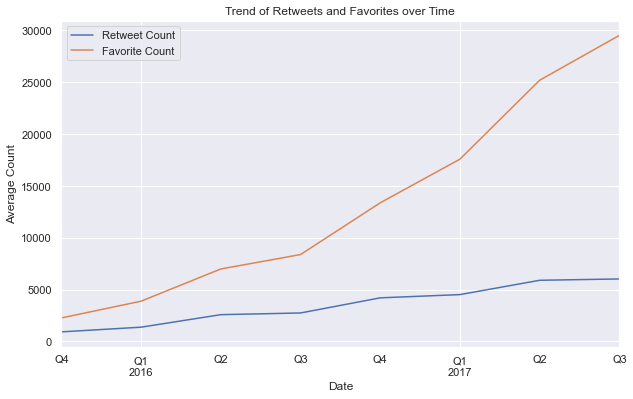

In [8]:
avg_retweet_count_resample.plot(label='Retweet Count')
avg_favorite_count_resample.plot(label='Favorite Count')

# title and labels
plt.ylabel('Average Count')
plt.xlabel('Date')
plt.title('Trend of Retweets and Favorites over Time')
# Save graph image
plt.savefig("images/Trend_Retweets_Favorites.jpg")
# legend
plt.legend()

- We see that there are more favorites than retweets. The favorite count increases strongly, the retweet count seems increases slowly.

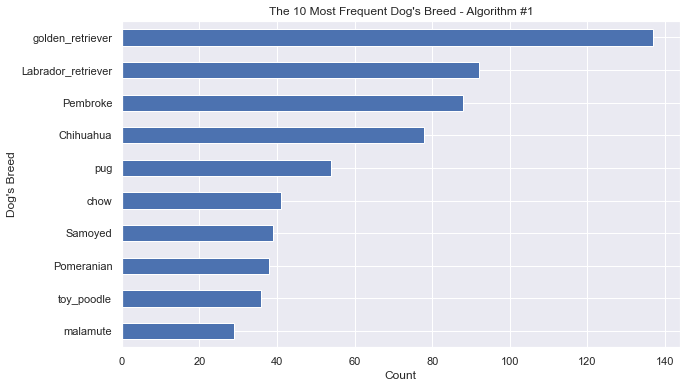

In [9]:
# The 10 most frequent distribution about dog breed inside level 1 (Algorithm #1).
merged_p1_df = twitter_archive_master_df.merge(image_predictions_master_df[image_predictions_master_df.prediction_level == 1],
         on='tweet_id', how='inner')
top_breed = merged_p1_df.prediction.value_counts().head(10).sort_values(ascending=True)
top_breed.plot(kind='barh')
plt.title('The 10 Most Frequent Dog\'s Breed - Algorithm #1')
plt.xlabel('Count');
plt.ylabel('Dog\'s Breed');
# Save graph image
plt.savefig("images/Most_Frequent_Dogs_Breed_P1.jpg")

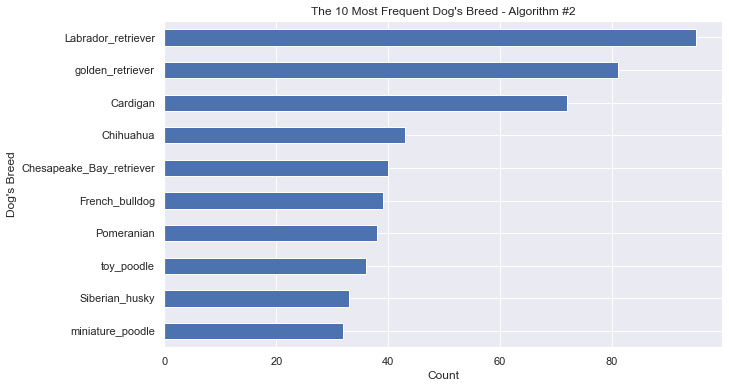

In [10]:
# The 10 most frequent distribution about dog breed inside level 2 (Algorithm #2).
merged_p2_df = twitter_archive_master_df.merge(image_predictions_master_df[image_predictions_master_df.prediction_level == 2],
         on='tweet_id', how='inner')
top_breed = merged_p2_df.prediction.value_counts().head(10).sort_values(ascending=True)
top_breed.plot(kind='barh')
plt.title('The 10 Most Frequent Dog\'s Breed - Algorithm #2')
plt.xlabel('Count');
plt.ylabel('Dog\'s Breed');
# Save graph image
plt.savefig("images/Most_Frequent_Dogs_Breed_P2.jpg")

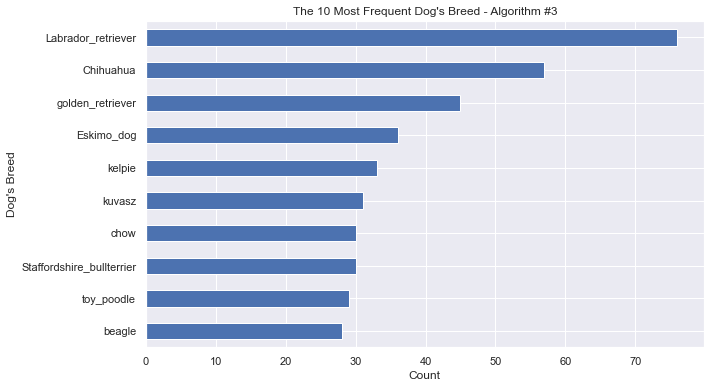

In [11]:
# The 10 most frequent distribution about dog breed inside level 3 (Algorithm #3).
merged_p3_df = twitter_archive_master_df.merge(image_predictions_master_df[image_predictions_master_df.prediction_level == 3],
         on='tweet_id', how='inner')
top_breed = merged_p3_df.prediction.value_counts().head(10).sort_values(ascending=True)
top_breed.plot(kind='barh')
plt.title('The 10 Most Frequent Dog\'s Breed - Algorithm #3')
plt.xlabel('Count');
plt.ylabel('Dog\'s Breed');
# Save graph image
plt.savefig("images/Most_Frequent_Dogs_Breed_P3.jpg")

In [13]:
# Calculate the number of breeds in each algorithm with more than 20
p1 = sum(merged_p1_df.prediction.value_counts() > 20)
p2 = sum(merged_p2_df.prediction.value_counts() > 20)
p3 = sum(merged_p3_df.prediction.value_counts() > 20)

# Print breeds count for each algorithm.
print("P1: {} breed.\nP2: {} breed.\nP3: {} breed.".format(p1,p2,p3))

P1: 15 breed.
P2: 18 breed.
P3: 21 breed.


- Algorithm #1 has fewer breeds and high frequence in some breeds.
- Algorithm #3 has more breeds and the dogs are spread in more breeds and also it has less frequence.

In [23]:
# the 10 breeds that receive the highest interaction in terms of average retweet count.
merged_df = twitter_archive_master_df.merge(image_predictions_master_df, on='tweet_id', how='inner')
breed_avg_retweet = merged_df.groupby(['prediction']).retweet_count.mean().sort_values(ascending=False)[9::-1]

breed_avg_retweet

prediction
oscilloscope       13873.5
gondola            14475.5
theater_curtain    15395.0
upright            16005.0
pool_table         16071.0
guillotine         16185.0
conch              16805.0
tiger_cat          17452.0
palace             18932.0
house_finch        34737.0
Name: retweet_count, dtype: float64

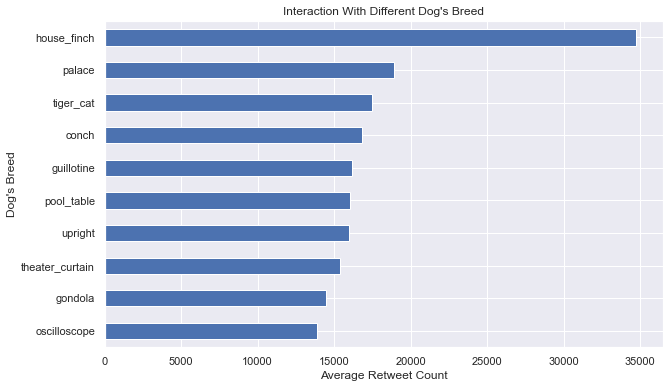

In [24]:
breed_avg_retweet.plot(kind='barh');
plt.title('Interaction With Different Dog\'s Breed');
plt.xlabel('Average Retweet Count');
plt.ylabel('Dog\'s Breed');
# Save graph image
plt.savefig("images/Interaction_With_Different_Dogs_Breed_Retweets.jpg")

In [25]:
# the 10 breeds that receive the lowest interaction in terms of average retweet count.
breed_low_avg_retweet = merged_df.groupby(['prediction']).retweet_count.mean().sort_values(ascending=True)[9::-1]

breed_low_avg_retweet

prediction
trombone              96.0
hair_spray            77.0
piggy_bank            77.0
pitcher               74.0
spotted_salamander    60.0
wing                  53.0
power_drill           45.0
crash_helmet          37.0
toaster               37.0
desk                  32.0
Name: retweet_count, dtype: float64

In [26]:
# the 10 breeds that receive the highest interaction in terms of average favorite count.
merged_df = twitter_archive_master_df.merge(image_predictions_master_df, on='tweet_id', how='inner')
breed_avg_favorite = merged_df.groupby(['prediction']).favorite_count.mean().sort_values(ascending=False)[9::-1]
breed_avg_favorite

prediction
dumbbell       31970.0
go-kart        31970.0
projectile     32035.0
revolver       32035.0
laptop         33109.0
tiger_cat      43513.0
guillotine     44579.0
palace         45212.0
conch          48103.5
house_finch    74815.0
Name: favorite_count, dtype: float64

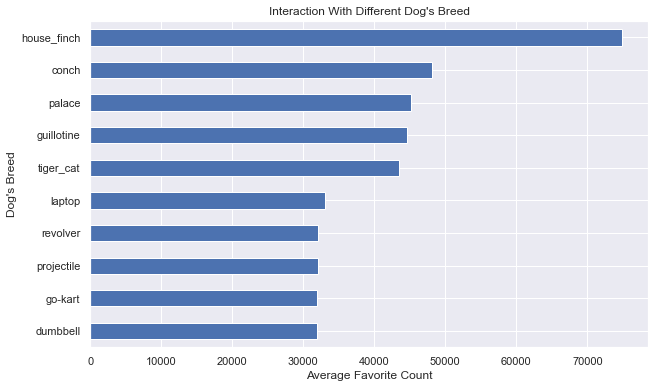

In [27]:
breed_avg_favorite.plot(kind='barh')
plt.title('Interaction With Different Dog\'s Breed')
plt.xlabel('Average Favorite Count');
plt.ylabel('Dog\'s Breed');

# Save graph image
plt.savefig("images/Interaction_With_Different_Dogs_Breed_Favorites.jpg")

In [28]:
# the 10 breeds that receive the lowest interaction in terms of average favorite count.
breed_low_avg_favorite = merged_df.groupby(['prediction']).favorite_count.mean().sort_values(ascending=True)[9::-1]
breed_low_avg_favorite

prediction
hair_spray      304.0
piggy_bank      304.0
trombone        277.0
French_horn     277.0
cornet          277.0
wing            221.0
toaster         186.0
crash_helmet    186.0
power_drill     151.0
desk            93.0 
Name: favorite_count, dtype: float64

- *house_finch* breed has highest interaction.
- *desk* breed has lowest interaction.

In [29]:
# Which dog stage is found most?
dog_stages = twitter_archive_master_df.dog_stages.value_counts()

dog_stages

pupper           201
doggo            62 
puppo            22 
doggo-pupper     8  
floofer          7  
doggo-floofer    1  
doggo-puppo      1  
Name: dog_stages, dtype: int64

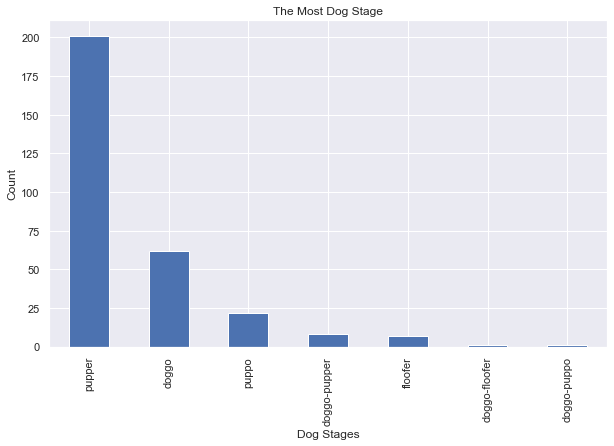

In [30]:
dog_stages.plot(kind='bar')
plt.xlabel('Dog Stages')
plt.ylabel('Count')
plt.title('The Most Dog Stage')
# Save graph image
plt.savefig("images/Most_Dog_Stage.jpg")

- We can see `pupper` is found maximum (201), followed by `doggo` (62).

In [31]:
# Interaction with different dog stages

avg_retweet_count_dog_stage = twitter_archive_master_df.groupby('dog_stages').retweet_count.mean()

print(avg_retweet_count_dog_stage)

print('---'*40)

avg_favorite_count_dog_stage = twitter_archive_master_df.groupby('dog_stages').favorite_count.mean()

print(avg_favorite_count_dog_stage)

dog_stages
doggo            6405.967742 
doggo-floofer    2999.000000 
doggo-pupper     3962.125000 
doggo-puppo      17092.000000
floofer          4267.571429 
pupper           2067.497512 
puppo            5712.000000 
Name: retweet_count, dtype: float64
------------------------------------------------------------------------------------------------------------------------
dog_stages
doggo            18570.903226
doggo-floofer    15604.000000
doggo-pupper     13024.250000
doggo-puppo      43794.000000
floofer          11844.857143
pupper           6601.940299 
puppo            20604.590909
Name: favorite_count, dtype: float64


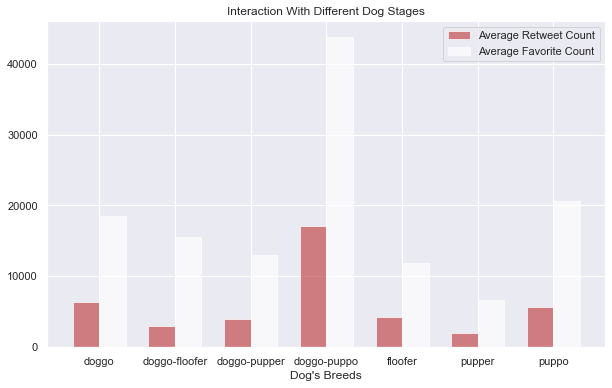

In [32]:
ind = np.arange(len(avg_favorite_count_dog_stage))
width = 0.35

# plot bars
retweet_bars = plt.bar(ind, avg_retweet_count_dog_stage, width, color='r', alpha=.7, label='Average Retweet Count')
favorite_bars = plt.bar(ind + width, avg_favorite_count_dog_stage, width, color='w', alpha=.7, label='Average Favorite Count')

# title and labels
plt.title('Interaction With Different Dog Stages')

#plt.ylabel('Average')
plt.xlabel('Dog\'s Breeds')

locations = ind + width / 2  # xtick locations
 
#twitter_archive_master_df[twitter_archive_master_df.dog_stages.notnull()].dog_stages.unique()
labels = ['doggo', 'doggo-floofer', 'doggo-pupper', 'doggo-puppo', 'floofer', 'pupper', 'puppo']

plt.xticks(locations, labels)

# Save graph image
plt.savefig("images/Interaction_With_Dogs_Stages_Retweets_Favorites.jpg")

# legend
plt.legend()

- *doggo_puppo* breed is the most retweeted and favorited dog stage.

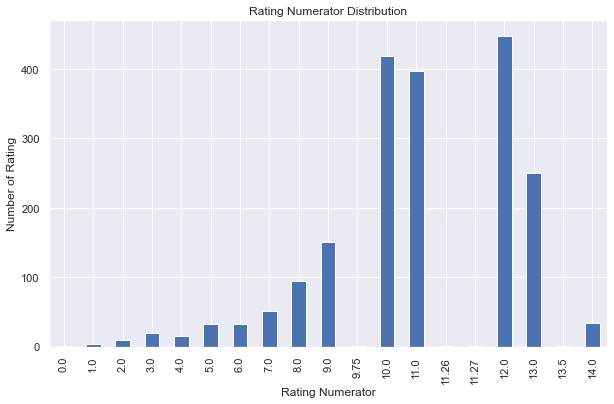

In [33]:
# Rating numerator distribution
rating_distribution = twitter_archive_master_df.rating_numerator.value_counts().sort_index().iloc[0:19]
rating_distribution.plot(kind='bar')
plt.title ('Rating Numerator Distribution')
plt.xlabel('Rating Numerator')
plt.ylabel('Number of Rating')
# Save graph image
plt.savefig("images/Rating_Numerator_Distribution.jpg")

- We see the most assigned numerator is `12`. 

In [36]:
# How many tweets rated above 9
# Get all tweets that have rating_numerator >= 10
tweets_list = twitter_archive_master_df[twitter_archive_master_df.rating_numerator >= 10]

# Drop tweets inside outliers
tweets_list = tweets_list[~tweets_list.tweet_id.isin(outliers_ids)]

print('{} tweets are rated above 9.'.format(tweets_list.rating_numerator.count()))

1551 tweets are rated above 9.


In [37]:
# How many tweets rated between 10 and 5
# Get all tweets that have rating_numerator > 10 & <= 5
tweets_list = twitter_archive_master_df[(twitter_archive_master_df.rating_numerator < 10) & (twitter_archive_master_df.rating_numerator >= 5)]

print('{} tweets are rated between 10 and 5.'.format(tweets_list.rating_numerator.count()))

362 tweets are rated between 10 and 5.


In [38]:
# How many tweets have low rating
# Get all tweets that have rating_numerator < 5
tweets_list = twitter_archive_master_df[twitter_archive_master_df.rating_numerator < 5]

print('{} tweets are rated under 5.'.format(tweets_list.rating_numerator.count()))

48 tweets are rated under 5.


In [39]:
# retweet_count and favorite_count
tweets_list_without_outliers = twitter_archive_master_df[~twitter_archive_master_df.tweet_id.isin(outliers_ids)]

tweets_list_without_outliers.loc[:,['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,1961.000000,1961.000000
mean,2421.165732,8179.427843
std,4331.252184,12039.377364
min,11.000000,69.000000
25%,539.000000,1752.000000
50%,1172.000000,3690.000000
75%,2773.000000,10191.000000
max,76180.000000,153545.000000


In [40]:
# Retweet count depending on rating numerator

print('Retweet Count mean for rating numerators above 9 is {}.'.format
      (tweets_list_without_outliers[tweets_list_without_outliers.rating_numerator >= 10].retweet_count.mean()))


print('Retweet Count mean for rating numerators between 10 to 5 is {}.'.format
      (tweets_list_without_outliers.retweet_count[(tweets_list_without_outliers.rating_numerator < 10) & (tweets_list_without_outliers.rating_numerator >= 5)].mean()))

print('Retweet Count mean for rating numerators under 5 is {}.'.format
      (tweets_list_without_outliers.retweet_count[tweets_list_without_outliers.rating_numerator < 5].mean()))

Retweet Count mean for rating numerators above 9 is 2841.1798839458415.
Retweet Count mean for rating numerators between 10 to 5 is 794.4337016574585.
Retweet Count mean for rating numerators under 5 is 1117.7291666666667.


In [41]:
# favorite count depending on rating numerator

print('Favorite Count mean for rating numerators above 9 is {}.'.format
      (tweets_list_without_outliers[tweets_list_without_outliers.rating_numerator >= 10].favorite_count.mean()))

print('Favorite Count mean for rating numerators between 10 to 5 is {}.'.format
      (tweets_list_without_outliers.favorite_count[(tweets_list_without_outliers.rating_numerator < 10) & ((tweets_list_without_outliers.rating_numerator >= 5))].mean()))

print('Favorite Count mean rating numerators under 5 is {}.'.format
      (tweets_list_without_outliers.favorite_count[tweets_list_without_outliers.rating_numerator < 5].mean()))

Favorite Count mean for rating numerators above 9 is 9708.976144422953.
Favorite Count mean for rating numerators between 10 to 5 is 2316.7127071823206.
Favorite Count mean rating numerators under 5 is 2970.5416666666665.


- if your dog got a rating numerator above 10 there is a good chance your dog will get more likes.

In [42]:
# The relation between ratings and the retweet_count and favorite_count
rating_avg_retweet = twitter_archive_master_df.groupby(['rating_numerator']).retweet_count.mean().iloc[0:19]
print(rating_avg_retweet)

rating_numerator
0.00     2954.000000
1.00     2693.250000
2.00     1147.444444
3.00     813.421053 
4.00     942.800000 
5.00     898.843750 
6.00     893.031250 
7.00     912.882353 
8.00     773.736842 
9.00     689.079470 
9.75     6132.000000
10.00    1325.264916
11.00    1903.085642
11.26    473.000000 
11.27    1604.000000
12.00    2738.533482
13.00    6253.372000
13.50    8840.000000
14.00    8668.705882
Name: retweet_count, dtype: float64


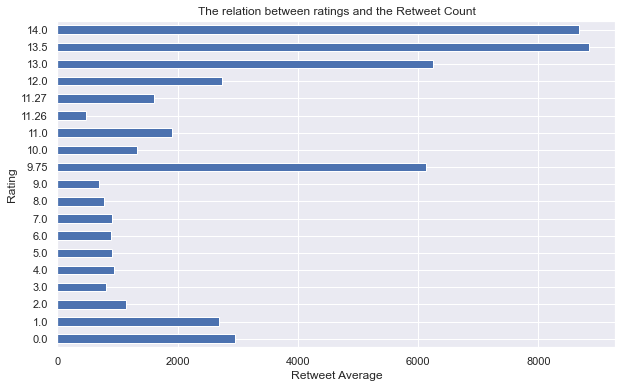

In [43]:
rating_avg_retweet.plot(kind='barh')
plt.title('The relation between ratings and the Retweet Count')
plt.xlabel('Retweet Average');
plt.ylabel('Rating');
plt.savefig("images/The_Relation_Between_Ratings_And_Retweets.jpg")

In [44]:
rating_avg_favorite = twitter_archive_master_df.groupby(['rating_numerator']).favorite_count.mean().iloc[0:19]
print(rating_avg_favorite)

rating_numerator
0.00     22090.000000
1.00     6383.000000 
2.00     1995.000000 
3.00     2122.578947 
4.00     2445.333333 
5.00     2334.906250 
6.00     2419.625000 
7.00     2692.705882 
8.00     2185.410526 
9.00     2141.178808 
9.75     18245.000000
10.00    3767.868735 
11.00    6193.256927 
11.26    1676.000000 
11.27    6524.000000 
12.00    10384.301339
13.00    21497.984000
13.50    42268.000000
14.00    27765.617647
Name: favorite_count, dtype: float64


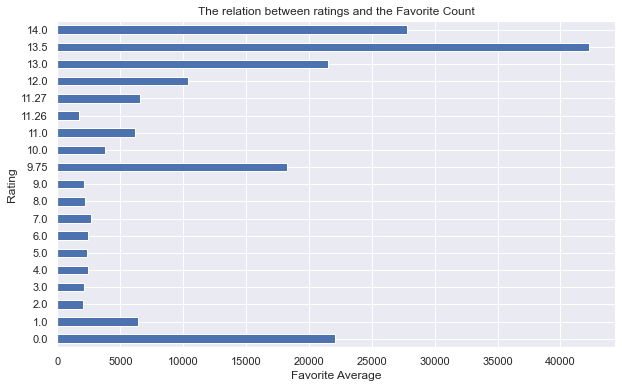

In [45]:
rating_avg_favorite.plot(kind='barh')
plt.title('The relation between ratings and the Favorite Count')
plt.xlabel('Favorite Average');
plt.ylabel('Rating');
plt.savefig("images/The_Relation_Between_Ratings_And_Favorites.jpg")

- We see the degree of audience interaction with tweets.
- With high rating, we get a good chance your dog will get more likes and retweets. 

In [46]:
# What is number of tweets monthly
selected_data = twitter_archive_master_df['tweet_id'].groupby([twitter_archive_master_df.index.year, twitter_archive_master_df.index.month]).count()
selected_data

timestamp  timestamp
2015       11           295
           12           359
2016       1            166
           2            108
           3            118
           4            54 
           5            56 
           6            79 
           7            87 
           8            59 
           9            62 
           10           65 
           11           52 
           12           54 
2017       1            66 
           2            63 
           3            45 
           4            40 
           5            42 
           6            43 
           7            49 
           8            2  
Name: tweet_id, dtype: int64

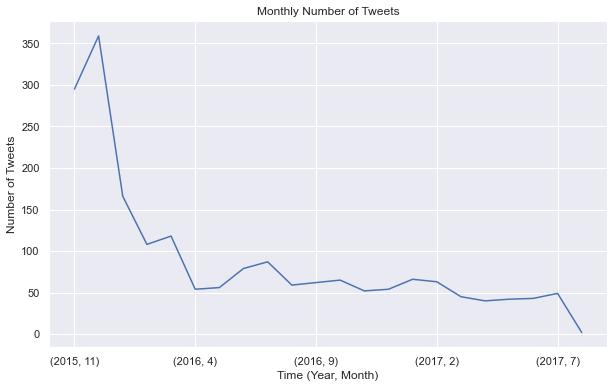

In [47]:
selected_data.plot(kind='line')
plt.title('Monthly Number of Tweets')
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig("images/Monthly_Number_Of_Tweets.jpg")

- We see the most tweets were posted in December 2015 (359 tweets). The number of tweets decreased rapidly April 2016 and remained fairly constant since then until July 2017.